# Autoencoder-based Anomaly Detection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from scipy.io.arff import loadarff
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import itertools
import time
import random

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score, precision_score, recall_score
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import imblearn
from imblearn.over_sampling import SMOTE
from keras.layers import BatchNormalization
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD, Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Convolution2D as Conv2D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.models import Sequential

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

## Retrieving data

In [ ]:
#Upload the dataset (trainingset)
dataframe1 = pd.read_csv('/content/drive/MyDrive/Autoencoder_based anomaly detection/ECG5000_TRAIN.csv', header=None)
dataframe1.drop(columns=dataframe1.columns[0], axis=1, inplace=True)
dataframe1.drop(index=0, inplace=True)
dataframe1.head()

,1,2,3,4,5,6,7,8,9,10,...,132,133,134,135,136,137,138,139,140,141
1,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1.0
2,-1.1008778,-3.9968398,-4.2858426,-4.5065789,-4.0223767,-3.2343676,-1.5661258,-0.99225766,-0.75467971,0.042321173,...,0.53835583,0.65688079,0.78748958,0.72404623,0.55578372,0.47633335,0.77381971,1.1196209,-1.4362499,1.0
3,-0.56708802,-2.5934502,-3.8742297,-4.5840949,-4.1874487,-3.1514617,-1.7429402,-1.4906585,-1.1835803,-0.39422869,...,0.88607336,0.5314524,0.31137684,-0.021918959,-0.71368344,-0.53219671,0.32109663,0.90422673,-0.42179659,1.0
4,0.49047253,-1.9144071,-3.6163638,-4.3188235,-4.2680158,-3.8811104,-2.9932802,-1.6711314,-1.3338845,-0.96562916,...,0.35081636,0.49911056,0.60034499,0.8420694,0.95207354,0.99013318,1.0867984,1.403011,-0.38356426,1.0
5,0.80023202,-0.87425189,-2.3847613,-3.9732924,-4.3382241,-3.8024222,-2.5345096,-1.7834233,-1.5944504,-0.75319899,...,1.1488838,0.95843425,1.0590254,1.3716823,1.2773918,0.96030393,0.97101956,1.6143924,1.4214563,1.0


In [ ]:
#Upload the dataset (testingset)
dataframe2 = pd.read_csv('/content/drive/MyDrive/Autoencoder_based anomaly detection/ECG5000_TEST.csv', header=None)
dataframe2.drop(columns=dataframe2.columns[0], axis=1, inplace=True)
dataframe2.drop(index=0, inplace=True)
dataframe2.head()

<ipython-input-4-c7ccffc6a2d9>:2: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe2 = pd.read_csv('/content/drive/MyDrive/Autoencoder_based anomaly detection/ECG5000_TEST.csv', header=None)


,1,2,3,4,5,6,7,8,9,10,...,132,133,134,135,136,137,138,139,140,141
1,3.6908442,0.71141435,-2.1140915,-4.1410068,-4.5744716,-3.4319085,-1.9507914,-1.1070667,-0.63232248,0.33457718,...,0.022846766,0.18893657,0.48093188,0.62925026,0.57729083,0.66552725,1.0359968,1.4922866,-1.9050734,1.0
2,-1.3481323,-3.9960376,-4.2267496,-4.2511874,-3.4779528,-2.2284217,-1.8084877,-1.5342415,-0.77986138,-0.39799914,...,1.5709378,1.5913944,1.5491932,1.193077,0.5151344,0.12627351,0.26753217,1.0711484,-1.164009,1.0
3,1.0242946,-0.59031419,-1.9169491,-2.806989,-3.5279051,-3.638675,-2.7797674,-2.0190308,-1.9807535,-1.4406797,...,0.44350192,0.82758242,1.237007,1.2351214,1.7381027,1.8007674,1.8163009,1.4739633,1.3897666,1.0
4,0.54565692,-1.014383,-2.3166977,-3.6340397,-4.196857,-3.7580926,-3.1944444,-2.2217637,-1.5885544,-1.2021459,...,0.77752982,1.1192396,0.90298365,0.5540976,0.49705263,0.41811561,0.70310771,1.0646019,-0.044853163,1.0
5,0.66113283,-1.5524706,-3.1246406,-4.3133515,-4.0170422,-3.0059934,-1.832411,-1.5038856,-1.0717055,-0.5213163,...,1.2808227,1.4943155,1.6187644,1.4474491,1.2385768,1.7496922,1.9868029,1.4227564,-0.35778384,1.0


In [ ]:
dataframe = pd.concat([dataframe1, dataframe2])

In [ ]:
print(dataframe[141].isnull().sum())
print(dataframe[141].unique())

0
[1. 2. 3. 4. 5.]


In [ ]:
dataframe = dataframe.rename(columns={dataframe.columns[140]: 'target'})
dataframe["target"] = dataframe["target"].astype('int')
dataframe

,1,2,3,4,5,6,7,8,9,10,...,132,133,134,135,136,137,138,139,140,target
1,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1
2,-1.1008778,-3.9968398,-4.2858426,-4.5065789,-4.0223767,-3.2343676,-1.5661258,-0.99225766,-0.75467971,0.042321173,...,0.53835583,0.65688079,0.78748958,0.72404623,0.55578372,0.47633335,0.77381971,1.1196209,-1.4362499,1
3,-0.56708802,-2.5934502,-3.8742297,-4.5840949,-4.1874487,-3.1514617,-1.7429402,-1.4906585,-1.1835803,-0.39422869,...,0.88607336,0.5314524,0.31137684,-0.021918959,-0.71368344,-0.53219671,0.32109663,0.90422673,-0.42179659,1
4,0.49047253,-1.9144071,-3.6163638,-4.3188235,-4.2680158,-3.8811104,-2.9932802,-1.6711314,-1.3338845,-0.96562916,...,0.35081636,0.49911056,0.60034499,0.8420694,0.95207354,0.99013318,1.0867984,1.403011,-0.38356426,1
5,0.80023202,-0.87425189,-2.3847613,-3.9732924,-4.3382241,-3.8024222,-2.5345096,-1.7834233,-1.5944504,-0.75319899,...,1.1488838,0.95843425,1.0590254,1.3716823,1.2773918,0.96030393,0.97101956,1.6143924,1.4214563,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4496,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.63836,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.17679,-4.00972,-2.874136,-2.008369,-1.808334,4
4497,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.49256,-2.69527,-1.849691,-1.374321,...,1.258419,1.90753,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,2
4498,-1.351779,-2.209006,-2.520225,-3.061475,-3.065141,-3.030739,-2.62272,-2.044092,-1.295874,-0.733839,...,-1.512234,-2.076075,-2.586042,-3.322799,-3.627311,-3.437038,-2.260023,-1.577823,-0.684531,2
4499,-1.124432,-1.905039,-2.192707,-2.90432,-2.900722,-2.761252,-2.569705,-2.043893,-1.490538,-0.938473,...,-2.821782,-3.268355,-3.634981,-3.168765,-2.245878,-1.26226,-0.443307,-0.559769,0.108568,2


In [ ]:
id_to_label = {
    1: "Normal",
    2: "Artial Premature",
    3: "Premature ventricular contraction",
    4: "Fusion of ventricular and normal",
    5: "Fusion of paced and normal"
}
dataframe['target'] = dataframe['target'].map(id_to_label)

In [ ]:
data_1 = dataframe[dataframe["target"] == 'Normal']
data_2 = dataframe[dataframe["target"] == 'Artial Premature']
data_3 = dataframe[dataframe["target"] == 'Premature ventricular contraction']
data_4 = dataframe[dataframe["target"] == 'Fusion of ventricular and normal']
data_5 = dataframe[dataframe["target"] == 'Fusion of paced and normal']
data_5.head(2)

,1,2,3,4,5,6,7,8,9,10,...,132,133,134,135,136,137,138,139,140,target
499,0.288011,-1.0980196,-2.5002499,-3.5985989,-3.6506084,-3.2815873,-2.2316013,-1.2506564,-1.0725741,-0.43430991,...,-0.029242159,0.071414393,0.11816081,-0.071966657,-0.17121424,0.13121145,0.049872417,0.01091496,-0.081534236,Fusion of paced and normal
500,-1.1336738,-2.7029409,-3.1209789,-3.5586694,-3.3124416,-2.607641,-1.3549388,-1.0147399,-0.79602313,-0.25959898,...,-3.2069422,-2.941677,-2.5571397,-1.4879458,-1.1188798,-0.73711285,-0.1108401,0.0018580663,-0.12263937,Fusion of paced and normal


## Data Augementation-Resampling

In [ ]:
from sklearn.utils import resample
data_1_resample = resample(data_1, n_samples=20000, 
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=20000, 
                           random_state=123, replace=True)
data_3_resample = resample(data_3, n_samples=20000, 
                           random_state=123, replace=True)
data_4_resample = resample(data_4, n_samples=20000, 
                           random_state=123, replace=True)
data_5_resample = resample(data_5, n_samples=20000, 
                           random_state=123, replace=True)

In [ ]:
dataframe= pd.concat([data_5_resample, data_1_resample, data_2_resample, data_3_resample, 
                          data_4_resample])

## Splitting dataset

In [ ]:
raw_data=dataframe.values
# The last element contains the labels
labels = raw_data[:, -1]

# The other data points are the electrocadriogram data
data = raw_data[:, 0:-1]

train_data, test_data, train_labels, test_labels = train_test_split(
    data, labels, test_size=0.2, random_state=21
)
train_data=np.asarray(train_data).astype(np.float32)

## Normalizing dataset

In [ ]:
min_val = tf.reduce_min(train_data)
max_val = tf.reduce_max(train_data)

train_data = (train_data - min_val) / (max_val - min_val)
test_data = (test_data - min_val) / (max_val - min_val)

train_data = tf.cast(train_data, tf.float32)
test_data = tf.cast(test_data, tf.float32)

train_labels = train_labels.astype(bool)
test_labels = test_labels.astype(bool)

## Ultity Functions

In [ ]:
def predict(model, data, threshold):
  reconstructions = model(data)
  loss = tf.keras.losses.mae(reconstructions, data)
  return tf.math.less(loss, threshold)

def print_stats(predictions, labels):
  print("Accuracy = {}".format(accuracy_score(labels, preds)))
  #print("Precision = {}".format(precision_score(labels, preds)))
  print("Recall = {}".format(recall_score(labels, preds)))
  print("F1-score = {}".format(f1_score(labels, preds)))


## Model 1- Adam optimizer + learning_rate=0.01

In [ ]:
class AnomalyDetector(Model):
  def __init__(self):
    super(AnomalyDetector, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Dense(32, activation="relu"),
      layers.Dense(16, activation="relu"),
      layers.Dense(8, activation="relu")])
    
    self.decoder = tf.keras.Sequential([
      layers.Dense(16, activation="relu"),
      layers.Dense(32, activation="relu"),
      layers.Dense(140, activation="tanh")])
    
  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = AnomalyDetector()

In [ ]:
#Training model
checkpoint_path = "path/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
weights = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='mae',
              run_eagerly=True)

In [ ]:
history = autoencoder.fit(train_data, train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True, 
          callbacks=[weights, 
          tf.keras.callbacks.TensorBoard("/tmp/tb_logs")])

Epoch 1/20
157/157 [==============================] - ETA: 0s - loss: 0.0469
Epoch 1: saving model to path/cp.ckpt
157/157 [==============================] - 8s 50ms/step - loss: 0.0469 - val_loss: 0.0315
Epoch 2/20
156/157 [============================>.] - ETA: 0s - loss: 0.0285
Epoch 2: saving model to path/cp.ckpt
157/157 [==============================] - 9s 55ms/step - loss: 0.0285 - val_loss: 0.0283
Epoch 3/20
157/157 [==============================] - ETA: 0s - loss: 0.0252
Epoch 3: saving model to path/cp.ckpt
157/157 [==============================] - 8s 52ms/step - loss: 0.0252 - val_loss: 0.0239
Epoch 4/20
156/157 [============================>.] - ETA: 0s - loss: 0.0231
Epoch 4: saving model to path/cp.ckpt
157/157 [==============================] - 8s 50ms/step - loss: 0.0231 - val_loss: 0.0226
Epoch 5/20
157/157 [==============================] - ETA: 0s - loss: 0.0227
Epoch 5: saving model to path/cp.ckpt
157/157 [==============================] - 11s 72ms/step - loss: 

In [ ]:
# Loads the weights
autoencoder.load_weights(checkpoint_path)
#Testing model
autoencoder.evaluate(test_data,  test_data, verbose=2)

625/625 - 7s - loss: 0.0169 - 7s/epoch - 11ms/step


0.016927829012274742

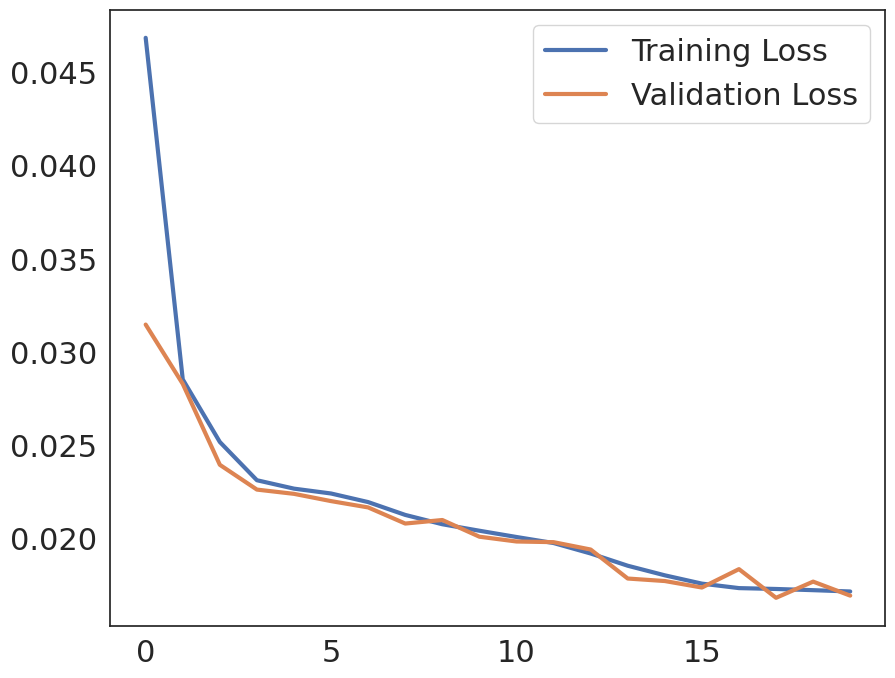

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /tmp/tb_logs/

import IPython

display(IPython.display.HTML('''
<button id='open_tb'>Open TensorBoard</button> 
<button id='hide_tb'>Hide TensorBoard</button> 
<script>document.querySelector('#open_tb').onclick = () => { window.open(document.querySelector('iframe').src, "__blank") }
        document.querySelector('#hide_tb').onclick = () => { document.querySelector('iframe').style.display = "none" }</script>'''))

<IPython.core.display.Javascript object>

2500/2500 [==============================] - 17s 7ms/step


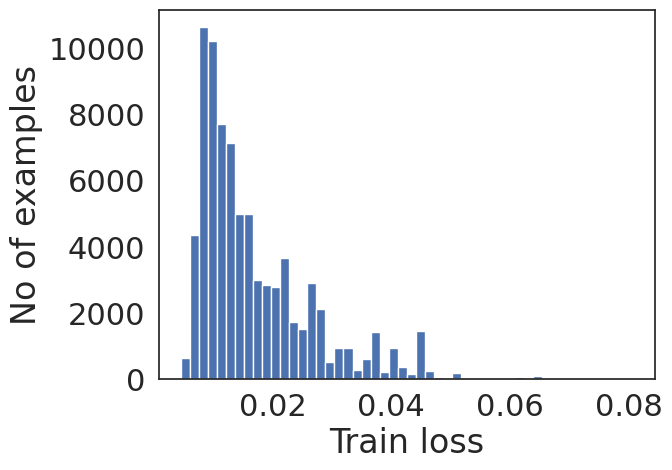

In [ ]:
reconstructions = autoencoder.predict(train_data)
train_loss = tf.keras.losses.mae(reconstructions, train_data)

plt.hist(train_loss, bins=50)
plt.xlabel("Train loss")
plt.ylabel("No of examples")
plt.show()

In [ ]:
threshold=np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.026787877


In [ ]:
reconstructions = autoencoder.predict(test_data)
test_loss = tf.keras.losses.mae(reconstructions, test_data)
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

625/625 [==============================] - 5s 8ms/step
Accuracy = 0.85415
Recall = 0.85415
F1-score = 0.9213386187741013


In [ ]:
normal_train_data = train_data[train_labels]
normal_test_data = test_data[test_labels]

anomalous_train_data = train_data[~train_labels]
anomalous_test_data = test_data[~test_labels]

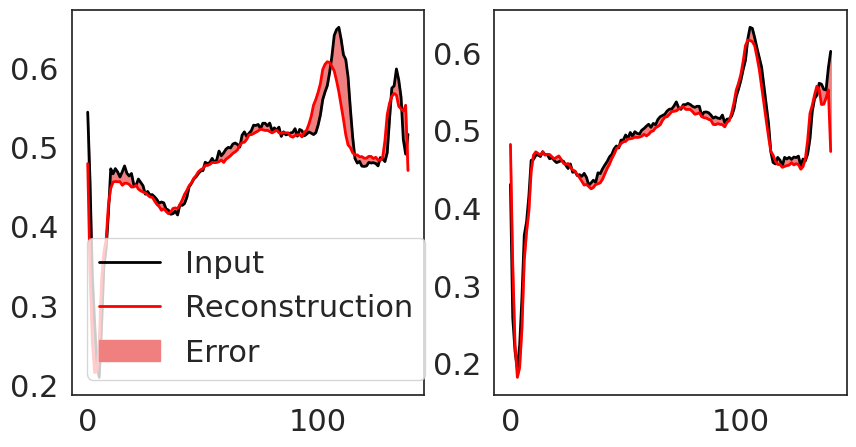

In [ ]:
encoded_imgs = autoencoder.encoder(normal_test_data).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(normal_test_data[0], 'black',linewidth=2)
plt.plot(decoded_imgs[0], 'red',linewidth=2)
plt.fill_between(np.arange(140), decoded_imgs[0], normal_test_data[0], color='lightcoral')
plt.legend(labels=["Input", "Reconstruction", "Error"])


plt.subplot(1,2,2)
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(normal_test_data[1], 'black',linewidth=2)
plt.plot(decoded_imgs[1], 'red',linewidth=2)
plt.fill_between(np.arange(140), decoded_imgs[1], normal_test_data[1], color='lightcoral')
#plt.legend(labels=["Input", "Reconstruction", "Error"])
plt.show()

2500/2500 [==============================] - 17s 7ms/step


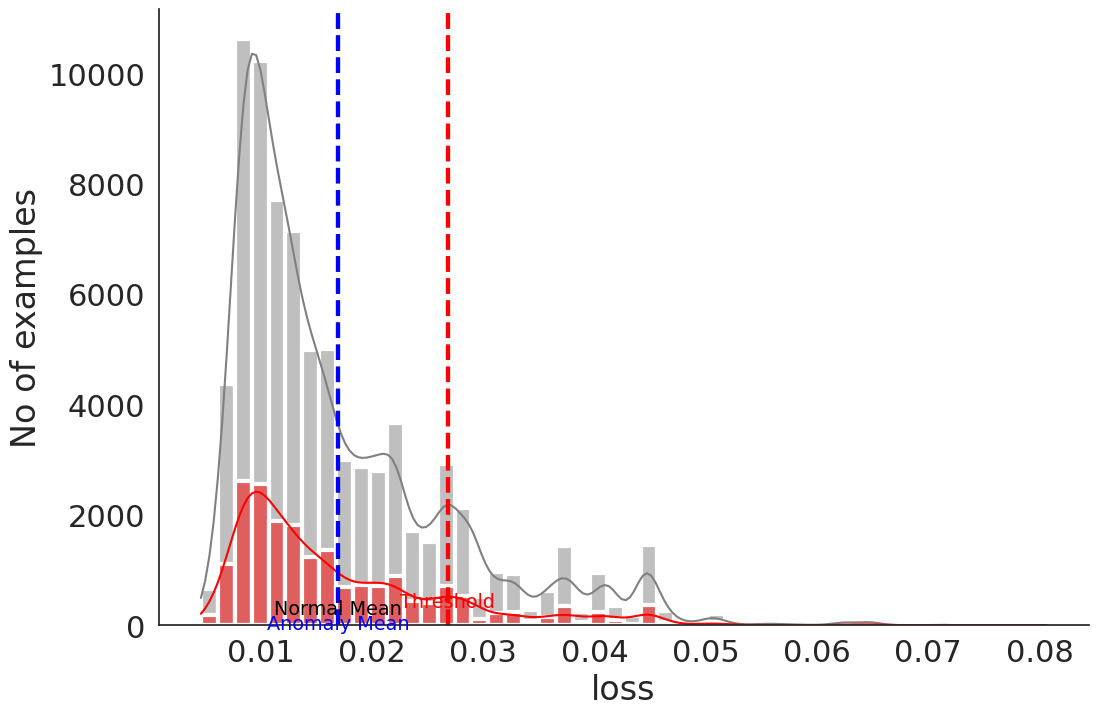

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)

plt.axvline(x=np.mean(train_loss), color='black', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='xx-small', color='black', weight='light')

plt.axvline(x=threshold, color='red', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center', va='bottom', 
         size='xx-small', color='red', weight='light')
sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)

plt.axvline(x=np.mean(test_loss), color='blue', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 200, "Anomaly Mean", horizontalalignment='center', va='top', 
        size='xx-small', color='blue', weight='light')
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

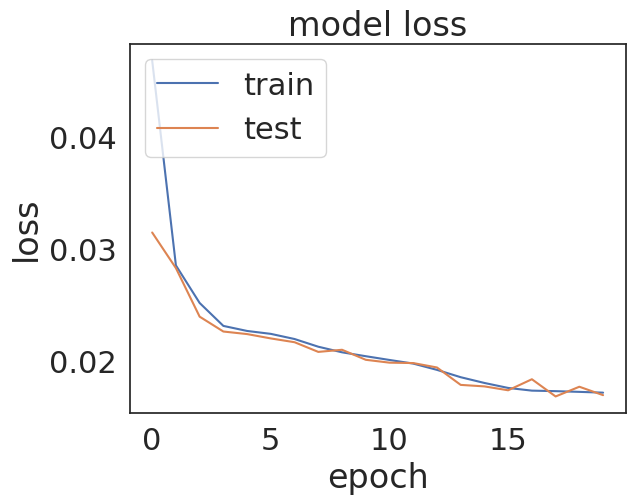

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Model 2- RMS optimizer + learning rate=0.01

In [ ]:
#Training model
checkpoint_path = "path/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
weights = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
autoencoder.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.01),
              loss='mae',
              run_eagerly=True)

In [ ]:
history = autoencoder.fit(train_data, train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True, 
          callbacks=[weights, 
          tf.keras.callbacks.TensorBoard("/tmp/tb_logs")])

Epoch 1/20
156/157 [============================>.] - ETA: 0s - loss: 0.0372
Epoch 1: saving model to path/cp.ckpt
157/157 [==============================] - 7s 43ms/step - loss: 0.0372 - val_loss: 0.0336
Epoch 2/20
157/157 [==============================] - ETA: 0s - loss: 0.0319
Epoch 2: saving model to path/cp.ckpt
157/157 [==============================] - 7s 45ms/step - loss: 0.0319 - val_loss: 0.0298
Epoch 3/20
157/157 [==============================] - ETA: 0s - loss: 0.0305
Epoch 3: saving model to path/cp.ckpt
157/157 [==============================] - 6s 41ms/step - loss: 0.0305 - val_loss: 0.0286
Epoch 4/20
156/157 [============================>.] - ETA: 0s - loss: 0.0296
Epoch 4: saving model to path/cp.ckpt
157/157 [==============================] - 7s 47ms/step - loss: 0.0297 - val_loss: 0.0291
Epoch 5/20
156/157 [============================>.] - ETA: 0s - loss: 0.0290
Epoch 5: saving model to path/cp.ckpt
157/157 [==============================] - 7s 42ms/step - loss: 0

In [ ]:
# Loads the weights
autoencoder.load_weights(checkpoint_path)
#Testing model
autoencoder.evaluate(test_data,  test_data, verbose=2)

625/625 - 6s - loss: 0.0267 - 6s/epoch - 9ms/step


0.026676828041672707

In [ ]:
threshold=np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.026787877


In [ ]:
reconstructions = autoencoder.predict(test_data)
test_loss = tf.keras.losses.mae(reconstructions, test_data)
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

625/625 [==============================] - 4s 6ms/step
Accuracy = 0.5948
Recall = 0.5948
F1-score = 0.745924253824931


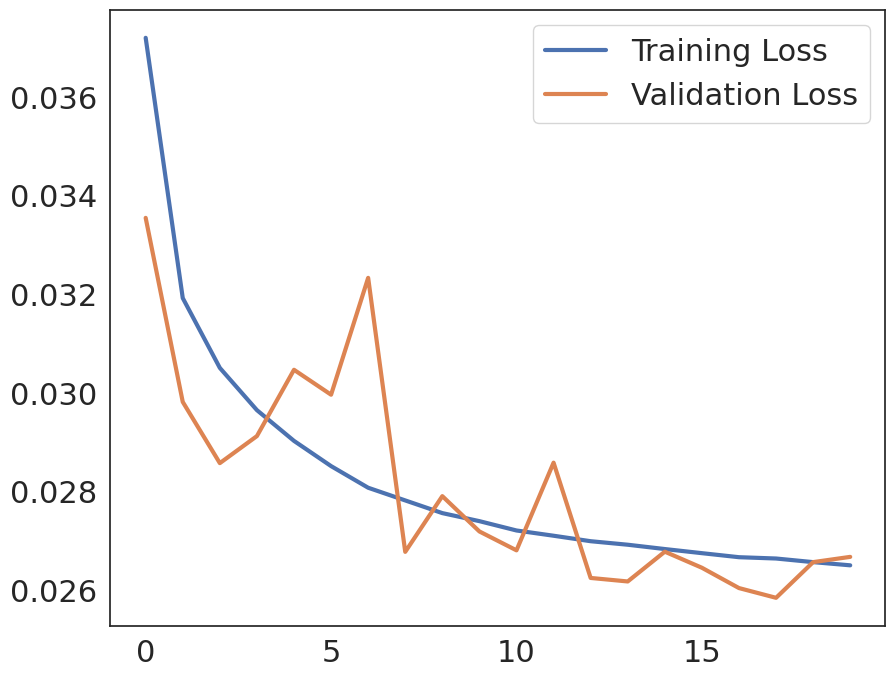

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

2500/2500 [==============================] - 16s 7ms/step


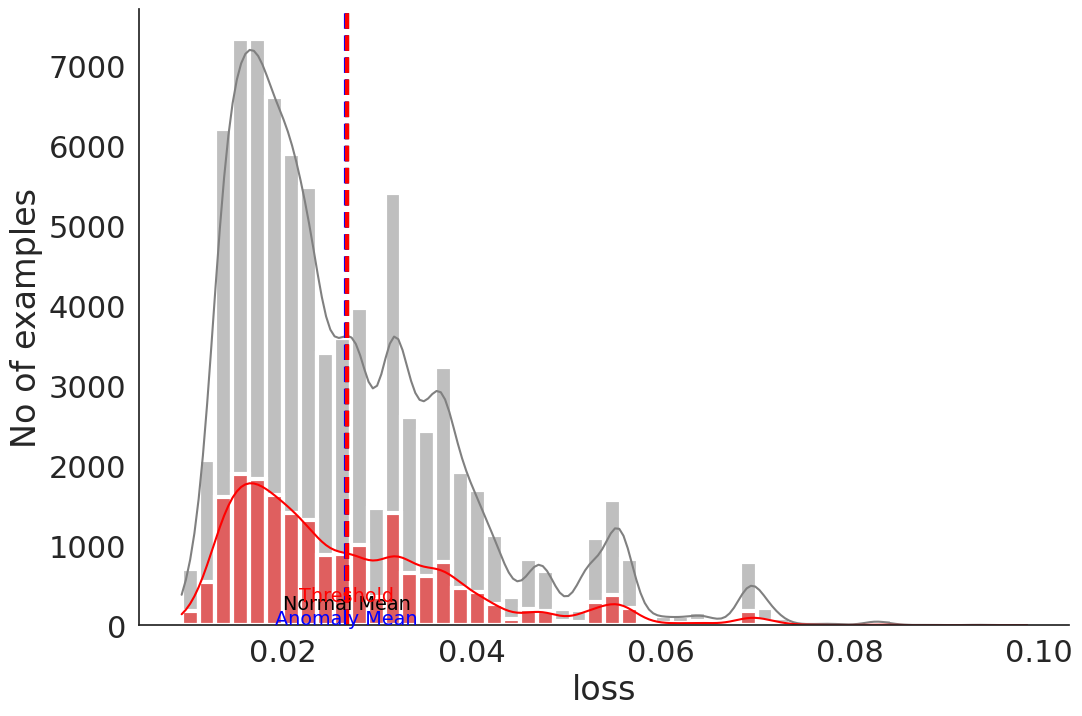

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)

plt.axvline(x=np.mean(train_loss), color='black', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='xx-small', color='black', weight='light')

plt.axvline(x=threshold, color='red', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center', va='bottom', 
         size='xx-small', color='red', weight='light')
sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)

plt.axvline(x=np.mean(test_loss), color='blue', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 200, "Anomaly Mean", horizontalalignment='center', va='top', 
        size='xx-small', color='blue', weight='light')
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /tmp/tb_logs/

import IPython

display(IPython.display.HTML('''
<button id='open_tb'>Open TensorBoard</button> 
<button id='hide_tb'>Hide TensorBoard</button> 
<script>document.querySelector('#open_tb').onclick = () => { window.open(document.querySelector('iframe').src, "__blank") }
        document.querySelector('#hide_tb').onclick = () => { document.querySelector('iframe').style.display = "none" }</script>'''))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1583), started 0:04:04 ago. (Use '!kill 1583' to kill it.)

<IPython.core.display.Javascript object>

## Model 3-SGD optimizer + learning rate=0.01

In [ ]:
#Training model
checkpoint_path = "path/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
weights = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
autoencoder.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mae',
              run_eagerly=True)

In [ ]:
history = autoencoder.fit(train_data, train_data, 
          epochs=20, 
          batch_size=512,
          validation_data=(test_data, test_data),
          shuffle=True, 
          callbacks=[weights, 
          tf.keras.callbacks.TensorBoard("/tmp/tb_logs")])

Epoch 1/20
156/157 [============================>.] - ETA: 0s - loss: 0.0260
Epoch 1: saving model to path/cp.ckpt
157/157 [==============================] - 7s 44ms/step - loss: 0.0260 - val_loss: 0.0255
Epoch 2/20
157/157 [==============================] - ETA: 0s - loss: 0.0254
Epoch 2: saving model to path/cp.ckpt
157/157 [==============================] - 6s 36ms/step - loss: 0.0254 - val_loss: 0.0252
Epoch 3/20
156/157 [============================>.] - ETA: 0s - loss: 0.0253
Epoch 3: saving model to path/cp.ckpt
157/157 [==============================] - 7s 44ms/step - loss: 0.0253 - val_loss: 0.0251
Epoch 4/20
157/157 [==============================] - ETA: 0s - loss: 0.0252
Epoch 4: saving model to path/cp.ckpt
157/157 [==============================] - 6s 38ms/step - loss: 0.0252 - val_loss: 0.0251
Epoch 5/20
157/157 [==============================] - ETA: 0s - loss: 0.0251
Epoch 5: saving model to path/cp.ckpt
157/157 [==============================] - 6s 40ms/step - loss: 0

In [ ]:
# Loads the weights
autoencoder.load_weights(checkpoint_path)
#Testing model
autoencoder.evaluate(test_data,  test_data, verbose=2)

625/625 - 7s - loss: 0.0249 - 7s/epoch - 11ms/step


0.02494198828935623

In [ ]:
threshold=np.mean(train_loss) + np.std(train_loss)
print("Threshold: ", threshold)

Threshold:  0.039277576


In [ ]:
reconstructions = autoencoder.predict(test_data)
test_loss = tf.keras.losses.mae(reconstructions, test_data)
preds = predict(autoencoder, test_data, threshold)
print_stats(preds, test_labels)

625/625 [==============================] - 4s 6ms/step
Accuracy = 0.87645
Recall = 0.87645
F1-score = 0.9341575848010871


2500/2500 [==============================] - 17s 7ms/step


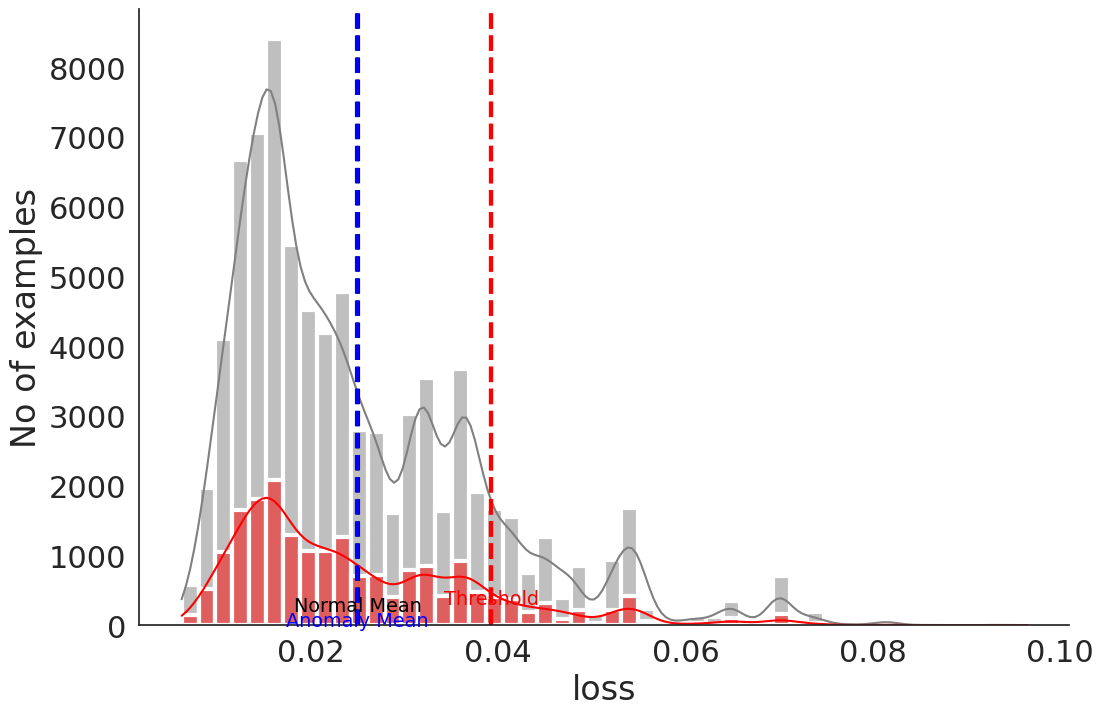

In [ ]:
reconstructions = autoencoder.predict(normal_train_data)
train_loss = tf.keras.losses.mae(reconstructions, normal_train_data)
plt.figure(figsize=(12,8))
sns.set(font_scale = 2)
sns.set_style("white")
sns.histplot(train_loss ,bins=50,kde=True,color='grey',linewidth=3)

plt.axvline(x=np.mean(train_loss), color='black', linestyle='--', linewidth=3)
plt.text(np.mean(train_loss), 200, "Normal Mean", horizontalalignment='center', 
         size='xx-small', color='black', weight='light')

plt.axvline(x=threshold, color='red', linestyle='--', linewidth=3)
plt.text(threshold, 250, "Threshold", horizontalalignment='center', va='bottom', 
         size='xx-small', color='red', weight='light')
sns.histplot(test_loss ,bins=50,kde=True,color='red',linewidth=3)

plt.axvline(x=np.mean(test_loss), color='blue', linestyle='--', linewidth=3)
plt.text(np.mean(test_loss), 200, "Anomaly Mean", horizontalalignment='center', va='top', 
        size='xx-small', color='blue', weight='light')
plt.axvline(x=threshold, color='red', linestyle='--', linewidth=3)
plt.xlabel("loss")
plt.ylabel("No of examples")
sns.despine()

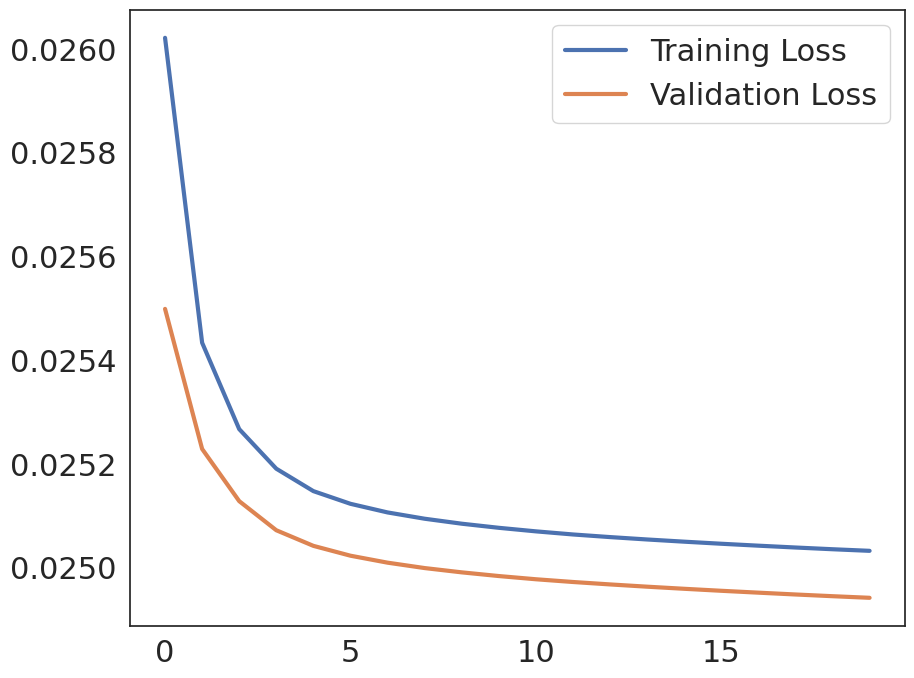

In [ ]:
plt.figure(figsize=(10,8))
sns.set(font_scale = 2)
sns.set_style("white")
plt.plot(history.history["loss"], label="Training Loss",linewidth=3.0)
plt.plot(history.history["val_loss"], label="Validation Loss",linewidth=3.0)
plt.legend()

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /tmp/tb_logs/

import IPython

display(IPython.display.HTML('''
<button id='open_tb'>Open TensorBoard</button> 
<button id='hide_tb'>Hide TensorBoard</button> 
<script>document.querySelector('#open_tb').onclick = () => { window.open(document.querySelector('iframe').src, "__blank") }
        document.querySelector('#hide_tb').onclick = () => { document.querySelector('iframe').style.display = "none" }</script>'''))

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 1583), started 0:06:43 ago. (Use '!kill 1583' to kill it.)

<IPython.core.display.Javascript object>

#Comments:

-	The highest accuracy was done by the model variant with the SGD optimizer, 0.2% more than the second highest variant, with Adam as its optimizer. 
-	Theoretically, SGD optimizer is better than Adam in this dataset, solely because it converges faster towards zero at the flat valley, having an overall better generalization. 
-	Also, the SGD-based variant is the most precise and has the highest True Positive Rate (TPR) relative to the others by a 0.1% (F1 score is a combination of precision and recall, so the higher the F1 score, the most precise the model is). 
-	Also, the training of the SGD variant is robust relative to Adam variant, as shown above, the SGD variant has a good balance between bias and variance.  
(Worst optimizer)RMSprop>Adam>SGD(Best optimizer)
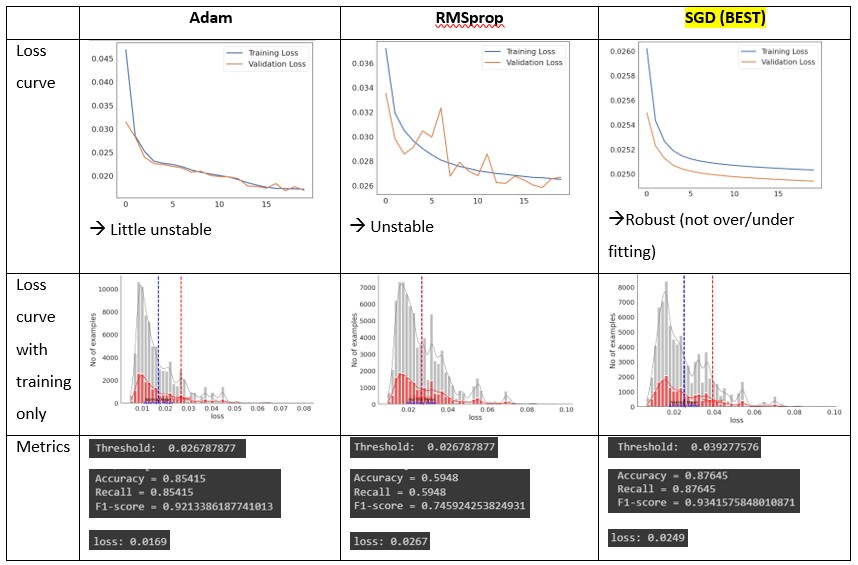
